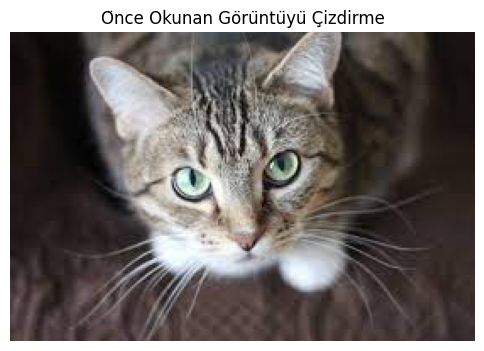

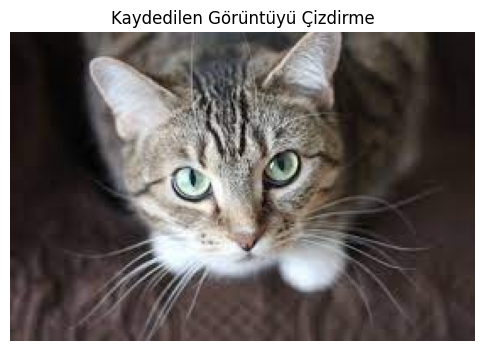

/content/cat.jpg Görselinin NumPy NdArray Matrisi:
[[[25 19 19]
  [25 19 19]
  [25 19 19]
  ...
  [26 20 20]
  [26 20 20]
  [26 20 20]]

 [[24 18 18]
  [25 19 19]
  [25 19 19]
  ...
  [26 20 20]
  [26 20 20]
  [26 20 20]]

 [[24 18 18]
  [24 18 18]
  [25 19 19]
  ...
  [26 20 20]
  [26 20 20]
  [26 20 20]]

 ...

 [[70 61 56]
  [73 64 59]
  [79 68 64]
  ...
  [57 47 48]
  [57 47 48]
  [57 47 48]]

 [[69 60 55]
  [72 63 58]
  [78 67 63]
  ...
  [58 48 49]
  [58 48 49]
  [58 48 49]]

 [[68 59 54]
  [71 62 57]
  [77 66 62]
  ...
  [59 49 50]
  [59 49 50]
  [59 49 50]]]
/content/cat.jpg Veri Tipi: uint8

/content/cat.jpg - İlk Pikselin RGB Değeri: [25 19 19]


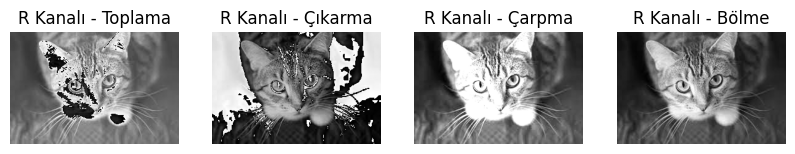

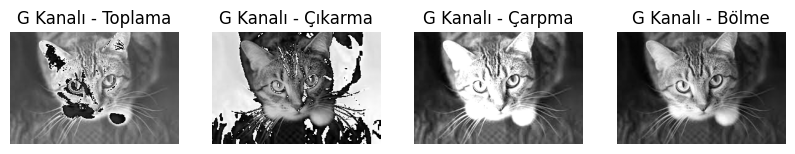

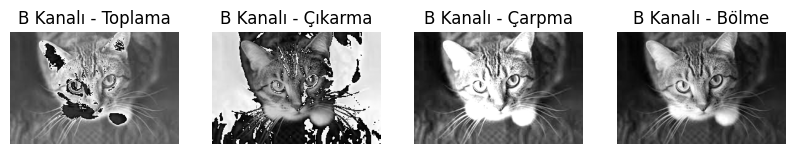

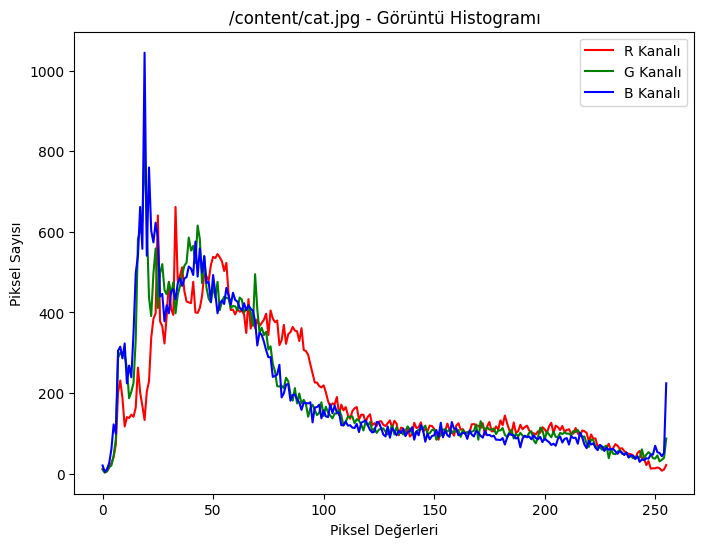

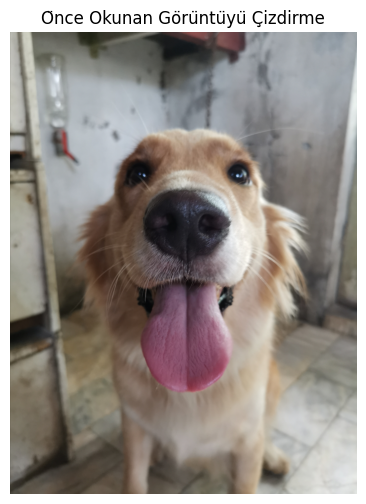

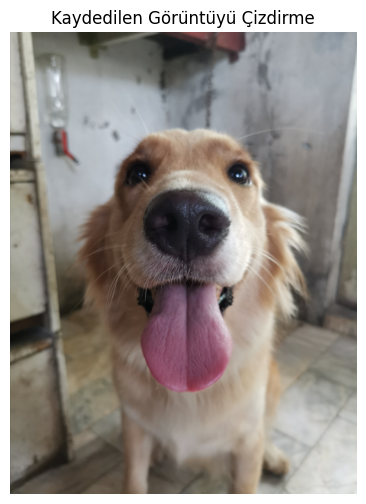

/content/kopek.jpg Görselinin NumPy NdArray Matrisi:
[[[116 116 108]
  [184 184 176]
  [185 185 175]
  ...
  [157 165 168]
  [157 165 168]
  [158 166 169]]

 [[114 114 106]
  [183 183 175]
  [185 185 175]
  ...
  [157 165 168]
  [157 165 168]
  [158 166 169]]

 [[116 116 108]
  [185 185 177]
  [185 185 175]
  ...
  [158 166 169]
  [158 166 169]
  [158 166 169]]

 ...

 [[ 43  43  33]
  [ 70  70  60]
  [ 70  70  60]
  ...
  [228 230 225]
  [229 231 228]
  [229 231 228]]

 [[ 45  45  35]
  [ 71  71  61]
  [ 71  71  61]
  ...
  [228 230 225]
  [229 231 228]
  [229 231 228]]

 [[ 46  46  36]
  [ 71  71  61]
  [ 73  70  61]
  ...
  [227 229 224]
  [228 230 227]
  [229 231 228]]]
/content/kopek.jpg Veri Tipi: uint8

/content/kopek.jpg - İlk Pikselin RGB Değeri: [116 116 108]


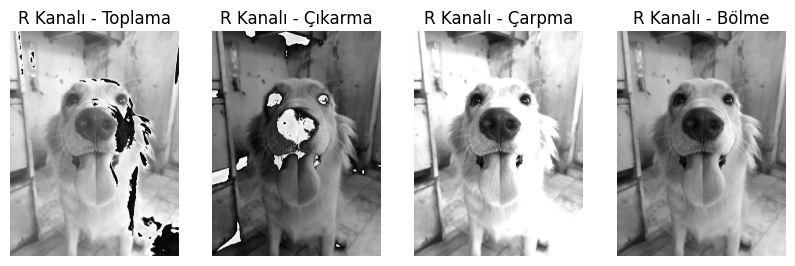

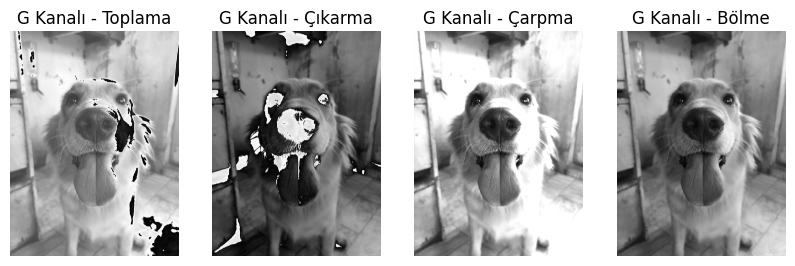

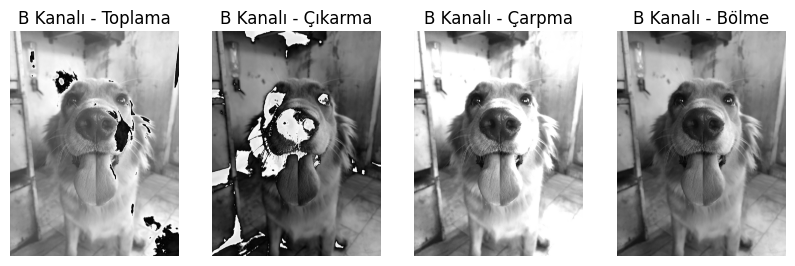

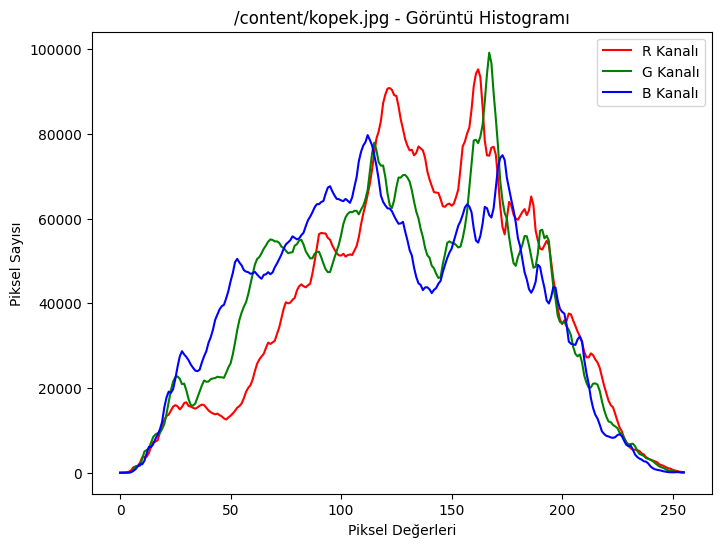

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_paths = ["/content/cat.jpg", "/content/kopek.jpg"]

for image_path in image_paths:

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title("Önce Okunan Görüntüyü Çizdirme")
    plt.axis("off")
    plt.show()


    saved_path = image_path.replace(".jpg", "_saved.jpg")
    cv2.imwrite(saved_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))


    saved_image = cv2.imread(saved_path)
    saved_image = cv2.cvtColor(saved_image, cv2.COLOR_BGR2RGB)


    plt.figure(figsize=(6, 6))
    plt.imshow(saved_image)
    plt.title("Kaydedilen Görüntüyü Çizdirme")
    plt.axis("off")
    plt.show()


    print(f"{image_path} Görselinin NumPy NdArray Matrisi:")
    print(image)

    print(f"{image_path} Veri Tipi: {image.dtype}\n")


    print(f"{image_path} - İlk Pikselin RGB Değeri: {image[0, 0]}")


    r_channel = image[:, :, 0]
    g_channel = image[:, :, 1]
    b_channel = image[:, :, 2]


    channels = {'R': r_channel, 'G': g_channel, 'B': b_channel}

    for channel_name, channel in channels.items():
        addition = np.clip(channel + 50, 0, 255)
        subtraction = np.clip(channel - 50, 0, 255)
        multiplication = np.clip(channel * 1.5, 0, 255)
        division = np.clip(channel / 2, 0, 255)


        plt.figure(figsize=(10, 4))

        plt.subplot(1, 4, 1)
        plt.imshow(addition, cmap='gray')
        plt.title(f"{channel_name} Kanalı - Toplama")
        plt.axis("off")

        plt.subplot(1, 4, 2)
        plt.imshow(subtraction, cmap='gray')
        plt.title(f"{channel_name} Kanalı - Çıkarma")
        plt.axis("off")

        plt.subplot(1, 4, 3)
        plt.imshow(multiplication, cmap='gray')
        plt.title(f"{channel_name} Kanalı - Çarpma")
        plt.axis("off")

        plt.subplot(1, 4, 4)
        plt.imshow(division, cmap='gray')
        plt.title(f"{channel_name} Kanalı - Bölme")
        plt.axis("off")

        plt.show()


    plt.figure(figsize=(8, 6))
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = np.histogram(image[:, :, i].flatten(), bins=256, range=[0, 256])[0]
        plt.plot(hist, color=color, label=f"{color.upper()} Kanalı")

    plt.title(f"{image_path} - Görüntü Histogramı")
    plt.xlabel("Piksel Değerleri")
    plt.ylabel("Piksel Sayısı")
    plt.legend()
    plt.show()